In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Leitura do dataset

In [12]:
df = pd.read_csv('./misp.csv', delimiter=',', nrows = None)
df.dataframeName = 'misp.csv'
nRow, nCol = df.shape
print(f'Existem {nRow} linhas e {nCol} colunas')

Existem 138724 linhas e 7 colunas


In [14]:
df

,uuid,event_id,category,type,value,to_ids,date
0,56e96300-1504-414c-8c23-420b950d210f,1,Network activity,url,http://api.holycrossservices.info/dri/donate.php,1,20160316
1,56e96300-1b18-40fe-b1e1-4edb950d210f,1,Network activity,ip-dst,176.103.56.36,1,20160316
2,56e96300-4894-4f5c-9af3-4adb950d210f,1,Network activity,hostname,api.holycrossservices.info,1,20160316
3,56e96300-a3f0-4aa7-adc7-4cbe950d210f,1,Network activity,url,http://api.holycrossservices.net/dri/donate.php,1,20160316
4,56e96301-0548-400f-97b1-4300950d210f,1,Network activity,hostname,api.holycrossservices.org,1,20160316
...,...,...,...,...,...,...,...
138719,57dab1c8-3450-4a42-bd96-1b6f950d210f,482,Network activity,domain,rimpro.ru,1,20160915
138720,57dab1c9-2f70-47f8-b3dc-1b6f950d210f,482,Network activity,domain,techboss.net,1,20160915
138721,57dab1c9-6c7c-4ca2-b592-1b6f950d210f,482,Network activity,domain,tommylam.com,1,20160915
138722,57dab1ca-8a5c-41cc-9882-1b6f950d210f,482,Network activity,domain,trudprom.ru,1,20160915


In [15]:
df_selected = df[['category', 'type', 'value']].copy()
df_selected

,category,type,value
0,Network activity,url,http://api.holycrossservices.info/dri/donate.php
1,Network activity,ip-dst,176.103.56.36
2,Network activity,hostname,api.holycrossservices.info
3,Network activity,url,http://api.holycrossservices.net/dri/donate.php
4,Network activity,hostname,api.holycrossservices.org
...,...,...,...
138719,Network activity,domain,rimpro.ru
138720,Network activity,domain,techboss.net
138721,Network activity,domain,tommylam.com
138722,Network activity,domain,trudprom.ru


In [16]:
pd.set_option('display.max_columns', None)
df_selected.describe()

,category,type,value
count,138724,138724,138724
unique,13,56,131751
top,Network activity,hostname,Data entered by David André
freq,73383,32688,20


In [17]:
for columns in df.columns:
  print(columns)

uuid
event_id
category
type
value
to_ids
date


# Rotulação dos dados

In [18]:
print(', '.join(df_selected['category'].unique()))

Network activity, Payload delivery, External analysis, Payload installation, Financial fraud, Targeting data, Artifacts dropped, Other, Antivirus detection, Attribution, Persistence mechanism, Internal reference, Payload type


# Distribuição dos dados

In [19]:
display(pd.DataFrame({
    'frequência': df_selected['category'].value_counts(), 
    'porcentagem': df_selected['category'].value_counts(normalize=True) * 100
}))

,frequência,porcentagem
Network activity,73383,52.898561
Payload delivery,42913,30.934085
External analysis,12808,9.232721
Artifacts dropped,5941,4.282604
Payload installation,3044,2.194285
Attribution,286,0.206165
Antivirus detection,171,0.123266
Targeting data,77,0.055506
Other,47,0.033880
Financial fraud,25,0.018021


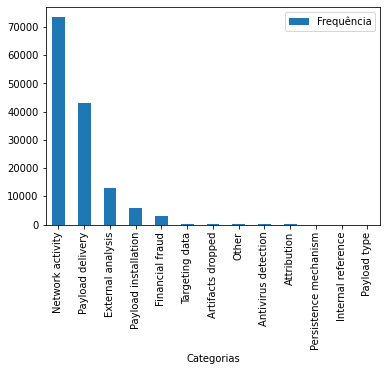

In [20]:
freq_df = pd.DataFrame({
    'Categorias': df_selected['category'].unique(),
    'Frequência': df_selected['category'].value_counts()
})
freq_df.plot(x ='Categorias', y='Frequência', kind = 'bar')
plt.show()

In [21]:
display(pd.DataFrame({
    'frequência': df_selected['type'].value_counts(), 
    'porcentagem': df_selected['type'].value_counts(normalize=True) * 100
}))

,frequência,porcentagem
hostname,32688,23.563334
md5,21665,15.617341
domain,17509,12.621464
sha256,13371,9.638563
sha1,10961,7.901300
link,9927,7.155936
ip-dst,9559,6.890661
ip-src,7379,5.319195
url,4198,3.026153
malware-sample,2264,1.632018


In [22]:
df_selected['type'].describe()

count       138724
unique          56
top       hostname
freq         32688
Name: type, dtype: object